# Preliminary Analysis & Theme 1

By Paul Duckworth 12th Jul 2018.

- Read in the Healthcare Observed Dataset

- Perform dataset-wide analysis, and also occupation specific analysis. 


In [2]:
# encoding=utf8
import os
import numpy as np
import pandas as pd
import getpass
import pickle
import string
import itertools
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import rc
rc('font',**{'family': 'serif', 'serif':"Computer Modern Roman"})
rc('text', usetex=True)

import seaborn as sns
from scipy.stats import gaussian_kde
%matplotlib inline

pd.options

## # Input DATA set of observed Occupations and Tasks
datasets = '/home/'+ getpass.getuser() +'/Datasets/'
d = os.path.join(datasets, 'FoHealthcare/Final_dataset_02112018.xlsx')

excel_doc = pd.ExcelFile(d)
dataset = excel_doc.parse(sheet_name='ExpandedTasks')
dataset = dataset[dataset['clinical'] != 1]   # # REMOVE CLINICAL TASKS: 
print("All Task-Occu pairs: %s" % str(dataset.shape[0]))

task_dataset = excel_doc.parse(sheet_name='Tasks')
task_dataset = task_dataset[task_dataset['clinical'] != 1]
print("unique clerical tasks dataset:", task_dataset.shape)

# columns_required = ["Observed Occupation", "Task", "DWA ID", "Task Weight", "Task also done by"]
# data = matts_data#[columns_required]

# # data[data["Observed Occupation"] == "Summariser"]["Task also done by"].values
print("Unique Tasks: %s" % len(dataset["Task"].unique()))

out_file_path = "/home/scpd/Dropbox/Documents/Oxford/writing/FutureOfHealthcare_project_docs/FinalReports/Analysis_images/"
dataset[dataset["Weighted Average Automation Score"] == 3.8]

dataset = dataset.rename(columns = {'structured_work':'structured'})

cats = {1: 'Low', 2: 'Medium', 3: 'High'}
dataset = dataset.assign(catn = lambda x: np.floor(x['Weighted Average Automation Score']))
dataset['cat'] = dataset['catn'].map(cats)

dataset.head()

All Task-Occu pairs: 264
unique clerical tasks dataset: (108, 23)
Unique Tasks: 108


,Observed Occupation,Task,Task keywords/context,GP Code,DWA Task,DWA ID,Notes,Task also done by,Technology Use,Technology use3,...,partial automation,Future automation potential (FAP),FAP Notes,clinical,structured,Task Weight,Automation Scores,Weighted Average Automation Score,catn,cat
0,Administrator,Address problems that arise with building,NaN,BSC,"Notify others of emergencies, problems, or haz...",4.A.4.a.2.I08.D07; 4.A.4.a.2.I08.D04; 4.A.4.a....,NaN,Deputy Practice Manager; Administrator,NaN,NaN,...,no,no,NaN,0,-1,0.20; 0.20; 0.20; 0.20; 0.20;,2.87; 3.05; 3.58; 3.38; 2.76;,3.125736,3.0,High
1,Administrator,Answer phone,NaN,NaN,Answer telephones to direct calls or provide i...,4.A.4.a.3.I03.D11,NaN,Practice Nurse; Nurse Practitioner; Healthcare...,phone,desktop,...,no,no,NaN,0,-1,1.00;,3.38;,3.381018,3.0,High
2,Administrator,Checking for errors in paperwork,NaN,BSC,Check data for recording errors.,4.A.2.a.2.I01.D08,NaN,Administrator; Practice Manager; Secretary,desktop,paper forms,...,no,NaN,NaN,0,-1,1.00;,3.28;,3.284389,3.0,High
3,Administrator,Cleaning up information in the patients electr...,NaN,NaN,Process healthcare paperwork.,4.A.4.c.1.I01.D03,Summarisers do this while they are working wit...,Practice Nurse; Nurse Practitioner; Healthcare...,NaN,NaN,...,NaN,NaN,NaN,0,-1,1.00;,2.84;,2.840006,2.0,Medium
4,Administrator,Connecting human resources/making introduction...,NaN,BSC,Relay information between personnel.,4.A.4.a.2.I03.D11,NaN,Deputy Practice Manager; Administrator,NaN,NaN,...,no,no,NaN,0,-1,1.00;,3.44;,3.440598,3.0,High


In [3]:
unique_occupations = dataset["Observed Occupation"].unique()
clinical_occupations = ['General Practitioner', 'Healthcare Assistant', 'Nurse Practitioner', 'Phlebotomist', 'Practice Nurse']
clerical_occupations = [i for i in unique_occupations if i not in clinical_occupations]
print("clerical tasks: %s" % clerical_occupations)

clerical tasks: ['Administrator', 'Deputy Practice Manager', 'Pharmacy Technician', 'Practice Manager', 'Practice Pharmacist', 'Prescription Clerk', 'Receptionist', 'Scanning Clerk', 'Secretary', 'Summariser']


In [4]:
def boxplot_sorted(df, by, column, rot=0, vert=False):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    #sorts df2 by the median value.
    meds = df2.median().sort_values(ascending=False)
    return df2[meds.index].boxplot(rot=rot, grid=False, return_type="axes", vert=vert)

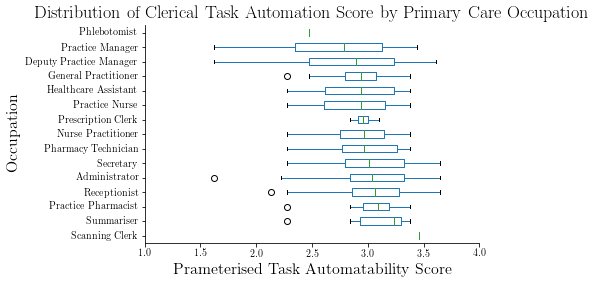

In [5]:
plt.cla
# ax = dataset.boxplot(vert=False, grid=False, column="Weighted Average Automation Score", by="Observed Occupation", order = unique_occupations)
ax = boxplot_sorted(dataset, "Observed Occupation", "Weighted Average Automation Score")
ax.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim([1.0, 4.0])
ax.set_ylabel("Occupation", fontsize=16)
ax.set_xlabel("Prameterised Task Automatability Score", fontsize=16)
ax.set_title("Distribution of Clerical Task Automation Score by Primary Care Occupation", fontsize=18)

savename = "all_occupation_box"
plt.savefig(out_file_path+"{}.pdf".format(savename), format="pdf", bbox_inches='tight')
plt.savefig(out_file_path+"{}.png".format(savename), format="png", bbox_inches='tight')



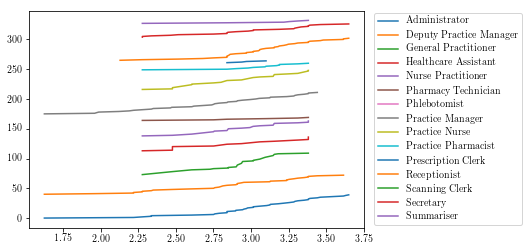

In [6]:
### 1. Occupation Level Automation 
i = 0
for occ in unique_occupations:
    occ_df = dataset[dataset["Observed Occupation"] == occ]
    auto_mean = occ_df["Weighted Average Automation Score"].mean()
    auto_std = occ_df["Weighted Average Automation Score"].std()
#     print("%s:  (%1.3f, %1.2f)" %(occ, auto_mean, auto_std))
    
    x = occ_df["Weighted Average Automation Score"].sort_values() 
    y = occ_df.index
#     df2 = occ_df[occ_df["Weighted Average Automation Score"] > 3]
    plt.plot(x,y)
plt.legend(unique_occupations, bbox_to_anchor=(1.25, 0.5), loc=10) # not correct order, thanks to df.index
plt.show()

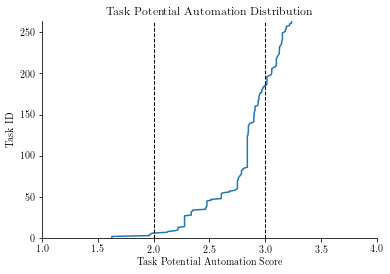

In [7]:
# 2. All Task Automation
X = dataset #.drop_duplicates("Task")
x = X["Weighted Average Automation Score"].sort_values()
y = X.index

fig, ax = plt.subplots()
ax.plot(x, y, color='#1f77b4')
ax.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ymax = len(y)

ax.plot([2]*ymax,range(len(y)), linestyle='--', linewidth=1., color='k')
ax.plot([3]*ymax,range(len(y)), linestyle='--', linewidth=1., color='k')
plt.axis([1, 4, 0, ymax])
ax.set_xlabel("Task Potential Automation Score")
ax.set_ylabel("Task ID")
ax.set_title("Task Potential Automation Distribution")
plt.show()

fig.savefig(out_file_path + "Distribution_of_Scores.pdf", bbox_inches='tight')
fig.savefig(out_file_path + "Distribution_of_Scores.png", bbox_inches='tight')

2.899715119858542 0.39709523795096996


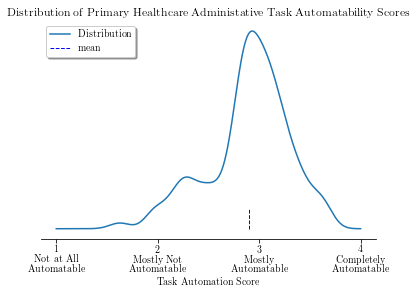

In [13]:
# plot the distribution
fig, ax = plt.subplots()

## # USES UNIQUE 108 TASKS (not repeated tasks from occupations who also perform them)

# y = dataset["Weighted Average Automation Score"]
y = task_dataset["Weighted Average Automation Score"]
print(np.mean(y), np.std(y))

density = gaussian_kde(y, 'scott')
# density = gaussian_kde(y, 'silverman')
xs = np.linspace(1,4,400)
density.covariance_factor = lambda : 0.25
density._compute_covariance()
ax.plot(xs,density(xs))

ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Task Automation Score")

ax.set_ylabel("")
# ax.vlines(x=2, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')
# ax.vlines(x=3, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')

m = ax.vlines(x=np.mean(y), ymax=max(density(xs))*0.1, ymin=0., linestyles='--', linewidth=1., color='b')

ax.set_xticks([1., 2., 3., 4.])
ax.set_xticklabels(['1\nNot at All\nAutomatable',
                    '2\nMostly Not\nAutomatable',
                    '3\nMostly\nAutomatable',
                    '4\nCompletely\nAutomatable'])

# ax.legend((k,m),("KDE","mean"), loc=2, shadow=True, fancybox=True)
ax.legend(("Distribution","mean"), loc=2, shadow=True, fancybox=True)

ax.set_title("Distribution of Primary Healthcare Administative Task Automatability Scores")
fig.savefig(out_file_path + "Density_of_Scores.pdf", bbox_inches='tight')
fig.savefig(out_file_path + "Density_of_Scores.png", bbox_inches='tight')
plt.show()

## All Healthcare Tasks:

In [14]:
# # Use Longtable in latex and ignore column overflows...

latex_cols = ['Task', 'Weighted Average Automation Score']

for i, row in task_dataset.sort_values(by="Weighted Average Automation Score")[latex_cols].iterrows():
#     print(len(row[0]))
    print("%s & %0.3f \\\\" % (row[0], row[1]))
    

Staff recruitment & 1.626 \\
Manage finances for the practice including paying bills & 1.960 \\
Writing and updating policies & 1.973 \\
Managing meeting diaries & 1.987 \\
Having practice staff take online training & 2.120 \\
Manage petty cash & 2.130 \\
Conducting training in-person & 2.190 \\
Manage pension schemes & 2.219 \\
Use accounting system, online or desktop software, for finances & 2.219 \\
Write notes on paper & 2.277 \\
Write medical report letters & 2.277 \\
Generate QOF letters & 2.277 \\
Use software for invoicing & 2.337 \\
Invoicing (private insurance) & 2.337 \\
Conduct risk assesment & 2.350 \\
Payroll in system called IRIS & 2.465 \\
Talk to other staff about incentive schemes & 2.472 \\
Print out lab test labels in ICE & 2.478 \\
Label blood vials & 2.478 \\
Maintain documentation for 2 week waits & 2.516 \\
Giving advice to colleagues/discuss medicine and other professional topics & 2.606 \\
Work in Open Exeter online web portal & 2.606 \\
Prepare for CQC regula

## Per Occupation Task Analysis:

In [15]:
# # Saves a csv file with this info in to disc...
def save_most_least_automatable_tasks(data, display_number_of_tasks = 3):
       
    display_cols = ["Task", "Observed Occupation", "Weighted Average Automation Score"]
    dataset_tasks = data.sort_values(by="Weighted Average Automation Score")

    low = dataset_tasks.iloc[:display_number_of_tasks,:][display_cols]
#     writer = pd.ExcelWriter(out_file_path + 'occupation_automation_tabs/low_auto_tasks_%s.xlsx' % file_name, engine='xlsxwriter')
#     low_risk_tasks[display_cols].to_excel(writer)
#     writer.save()

    high = dataset_tasks.iloc[-display_number_of_tasks:,:][display_cols]
#     writer = pd.ExcelWriter(out_file_path + 'occupation_automation_tabs/high_auto_tasks_%s.xlsx' % file_name, engine='xlsxwriter')
#     high_risk_tasks[display_cols].to_excel(writer)
#     writer.save()
    return low, high


In [17]:
low, high = save_most_least_automatable_tasks(task_dataset, 10)

for i, row in enumerate(low.iterrows()):
    occs = dataset[dataset["Task"] == row[1]["Task"]][["Observed Occupation"]].values
    occu = "".join("%s ;" % j[0].replace("'","") for j in occs)
    print("%s) & %s & %s  & %0.2f \\\\" % (i+1, row[1]["Task"], occu, row[1]["Weighted Average Automation Score"])) 

for i, row in enumerate(high.iterrows()):
    occs = dataset[dataset["Task"] == row[1]["Task"]][["Observed Occupation"]].values
    occu = "".join("%s ;" % j[0].replace("'","") for j in occs)
    print("%s) & %s & %s  & %0.2f \\\\" % (i+1, row[1]["Task"], occu, row[1]["Weighted Average Automation Score"])) 


1) & Staff recruitment & Administrator ;Deputy Practice Manager ;Practice Manager ;  & 1.63 \\
2) & Manage finances for the practice including paying bills & Deputy Practice Manager ;Practice Manager ;  & 1.96 \\
3) & Writing and updating policies & Practice Manager ;  & 1.97 \\
4) & Managing meeting diaries & Practice Manager ;  & 1.99 \\
5) & Having practice staff take online training & Practice Manager ;  & 2.12 \\
6) & Manage petty cash & Receptionist ;  & 2.13 \\
7) & Conducting training in-person & Practice Manager ;  & 2.19 \\
8) & Manage pension schemes & Administrator ;Deputy Practice Manager ;Practice Manager ;  & 2.22 \\
9) & Use accounting system, online or desktop software, for finances & Deputy Practice Manager ;  & 2.22 \\
10) & Write notes on paper & Administrator ;Deputy Practice Manager ;General Practitioner ;Healthcare Assistant ;Nurse Practitioner ;Pharmacy Technician ;Practice Manager ;Practice Nurse ;Practice Pharmacist ;Receptionist ;Secretary ;Summariser ;  & 2.

In [18]:
for occu in unique_occupations:
    print(occu,)
    name = occu.replace(" ", "_")
    df = dataset[dataset["Observed Occupation"] == occu]
    low, high = save_most_least_automatable_tasks(df, display_number_of_tasks = 3)    

Administrator
Deputy Practice Manager
General Practitioner
Healthcare Assistant
Nurse Practitioner
Pharmacy Technician
Phlebotomist
Practice Manager
Practice Nurse
Practice Pharmacist
Prescription Clerk
Receptionist
Scanning Clerk
Secretary
Summariser


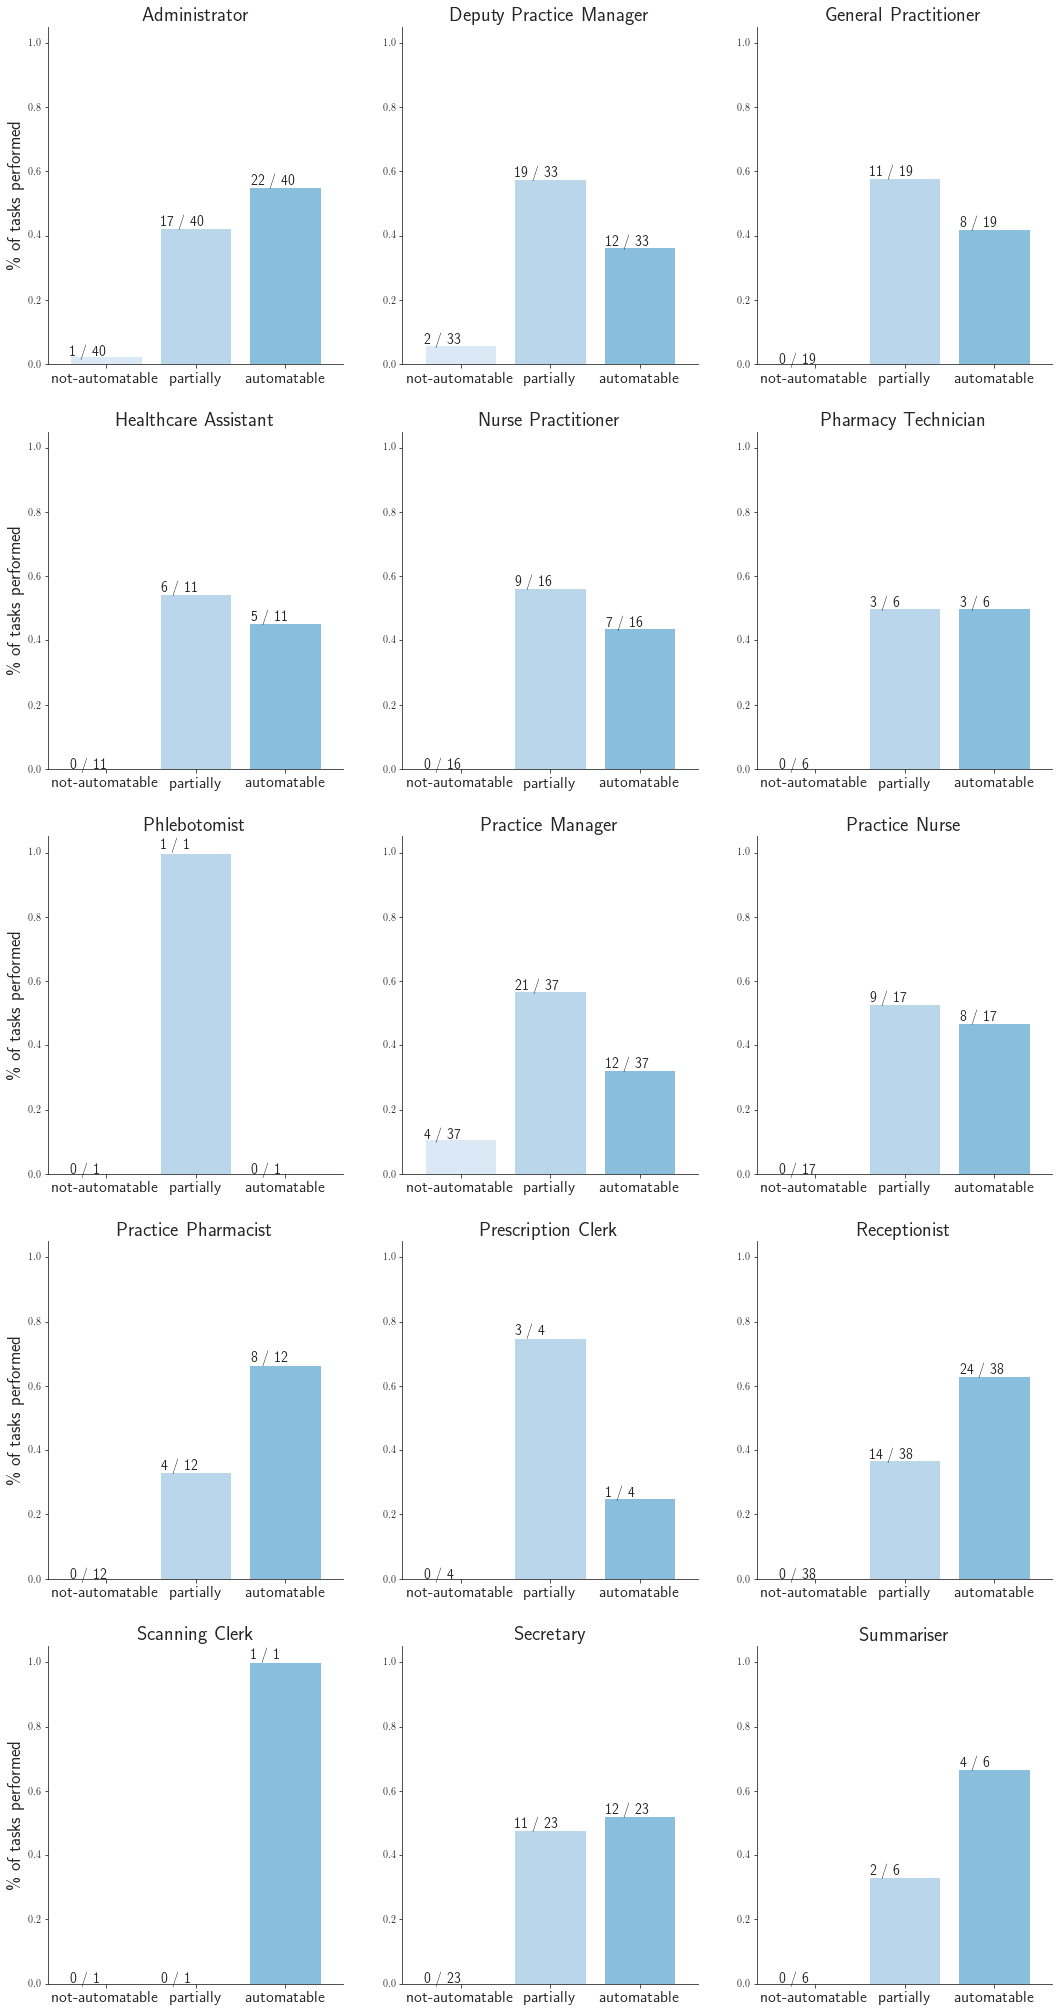

In [19]:
cnt = -1
import itertools as iter 
sns.set_style("white")
f, axarr = plt.subplots(5, 3, figsize=(18,36))
for i in range(5):
    for j in range(3):
        cnt+=1
        if cnt == 15:  ### Remove the 15th graph.
            axarr[i, j].spines['left'].set_visible(False)
            axarr[i, j].spines['bottom'].set_visible(False)
            axarr[i, j].spines['right'].set_visible(False)
            axarr[i, j].spines['top'].set_visible(False)
            axarr[i, j].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
            continue
            
#         print(cnt, i,j, unique_occupations[cnt])
    
        occu = dataset[dataset["Observed Occupation"] == unique_occupations[cnt]]
        d = occu["cat"].value_counts("cat").reindex(["Low", "Medium", "High"])
        d.plot.bar(ax=axarr[i, j],  width=0.8, color=sns.color_palette("Blues",6))
        
        if j==0: axarr[i, j].set_ylabel("\% of tasks performed", fontsize=18)
        axarr[i,j].set_title("%s" % unique_occupations[cnt], fontsize=20)    
        axarr[i, j].set_ylim([0,1.05])
        axarr[i, j].spines['right'].set_visible(False)
        axarr[i, j].spines['top'].set_visible(False)
        axarr[i, j].tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
        axarr[i, j].set_xticklabels( ['not-automatable','partially','automatable'], rotation=0 , fontsize=16)
        
        for p in axarr[i, j].patches:
            num = int(p.get_height()*occu["cat"].shape[0])
            tot = occu["cat"].shape[0]
            display = "%s / %s" %(num, tot)
            axarr[i, j].annotate(display, (p.get_x() * 1.015, p.get_height() * 1.01), fontsize=14)

savename = "all_occupation_hist"
plt.savefig(out_file_path+"{}.pdf".format(savename), format="pdf", bbox_inches='tight')
# plt.savefig("/tmp/{}.jpeg".format(savename), format="jpeg", bbox_inches='tight')

Administrator 3.0171585465705624 0.42496635571153285
Deputy Practice Manager 2.8316183836487077 0.469208388135776
General Practitioner 2.909184654215992 0.25510608042953137
Healthcare Assistant 2.9132698528792558 0.3682092345253042
Nurse Practitioner 2.933260253873506 0.3051506325231417
Pharmacy Technician 2.943358409174584 0.37469194398336214
Phlebotomist 2.477514570580391 0.0
Practice Manager 2.739867581980204 0.4708561914188684
Practice Nurse 2.9091521618218255 0.3309244290379141
Practice Pharmacist 3.037071032126366 0.2741759625151015
Prescription Clerk 2.961979931411705 0.09286735013797025
Receptionist 3.0684201766699917 0.3325236472918574
Scanning Clerk 3.460479465692119 0.0
Secretary 2.9882904261881005 0.39752399965125834
Summariser 3.046865604765084 0.38480293354961365


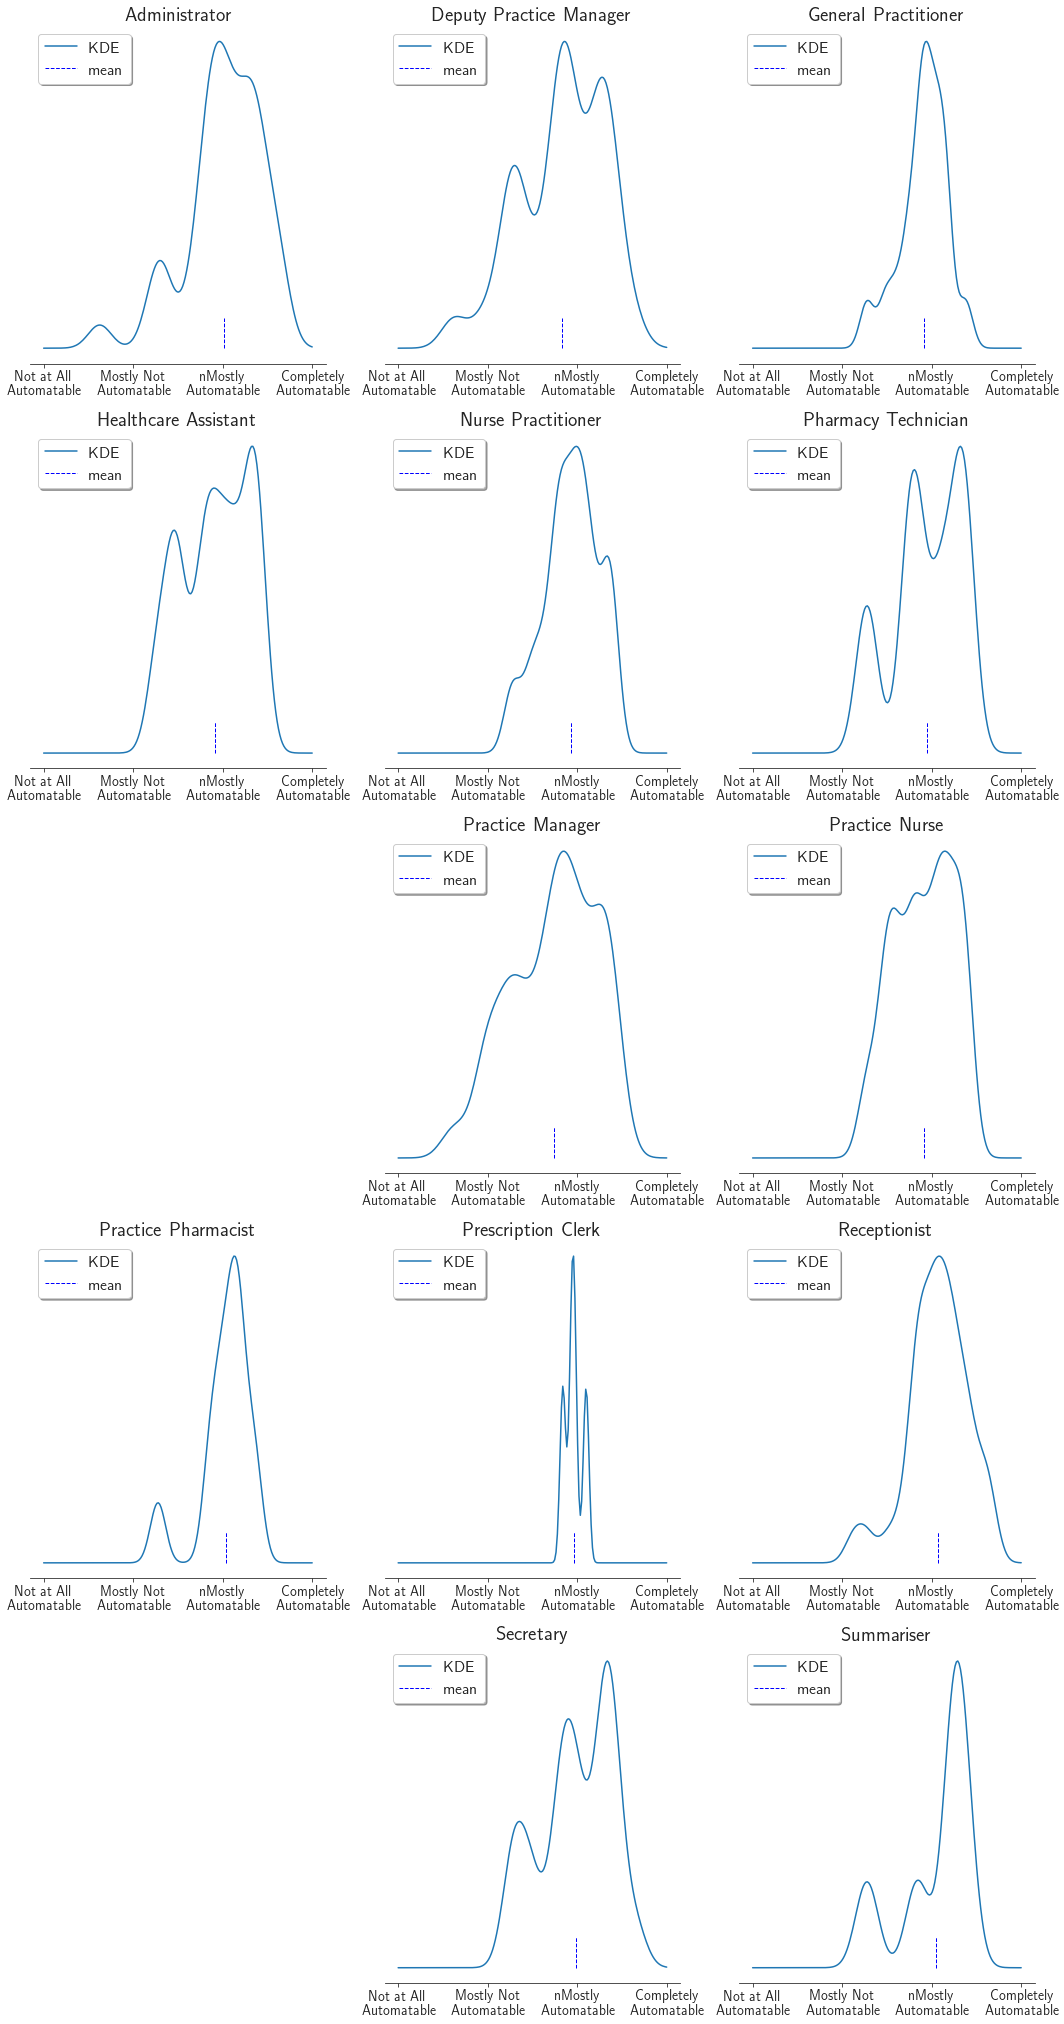

In [25]:
cnt = -1
import itertools as iter 
sns.set_style("white")
f, axarr = plt.subplots(5, 3, figsize=(18,36))
for i in range(5):
    for j in range(3):
        cnt+=1
        if cnt == 15:  ### Remove the 15th graph.
            axarr[i, j].spines['left'].set_visible(False)
            axarr[i, j].spines['bottom'].set_visible(False)
            axarr[i, j].spines['right'].set_visible(False)
            axarr[i, j].spines['top'].set_visible(False)
            axarr[i, j].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
            continue
            
#         print(cnt, i,j, unique_occupations[cnt])
    
        occu = dataset[dataset["Observed Occupation"] == unique_occupations[cnt]]
        
        y = occu["Weighted Average Automation Score"]    
        print(unique_occupations[cnt], np.mean(y), np.std(y))

        axarr[i, j].spines['right'].set_visible(False)
        axarr[i, j].spines['top'].set_visible(False)
        axarr[i, j].spines['left'].set_visible(False)
        axarr[i, j].tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
        
        if len(y) == 1: 
            axarr[i, j].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
            axarr[i, j].spines['bottom'].set_visible(False)
            continue
            
        density = gaussian_kde(y, 'scott')
        # density = gaussian_kde(y, 'silverman')
        xs = np.linspace(1,4,200)
        density.covariance_factor = lambda : 0.3
        density._compute_covariance()
        axarr[i, j].plot(xs,density(xs))
        
#         axarr[i, j].set_xlabel("Task Automation Score")
        # preds['GT Score 1-4'].plot.density()
        axarr[i, j].set_ylabel("")
#         axarr[i, j].vlines(x=2, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')
#         axarr[i, j].vlines(x=3, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')

        axarr[i, j].vlines(x=np.mean(y), ymax=max(density(xs))*0.1, ymin=0., linestyles='--', linewidth=1., color='b')

        axarr[i, j].set_xticks([1., 2., 3., 4.])
        axarr[i, j].set_xticklabels(['Not at All\nAutomatable',
                            'Mostly Not\nAutomatable',
                            'nMostly\nAutomatable',
                            'Completely\nAutomatable'], fontsize=14)
        axarr[i, j].legend(["KDE","mean"], loc=2, shadow=True, fancybox=True, fontsize=16)
#         axarr[i, j].set_title("KDE for %s" %  unique_occupations[cnt], fontsize=20)
        axarr[i, j].set_title("%s" %  unique_occupations[cnt], fontsize=20)
savename = "all_occupation_kde"
plt.savefig(out_file_path+"{}.pdf".format(savename), format="pdf", bbox_inches='tight')


In [31]:
clerical_occupations

['Administrator',
 'Deputy Practice Manager',
 'Pharmacy Technician',
 'Practice Manager',
 'Practice Pharmacist',
 'Prescription Clerk',
 'Receptionist',
 'Scanning Clerk',
 'Secretary',
 'Summariser']

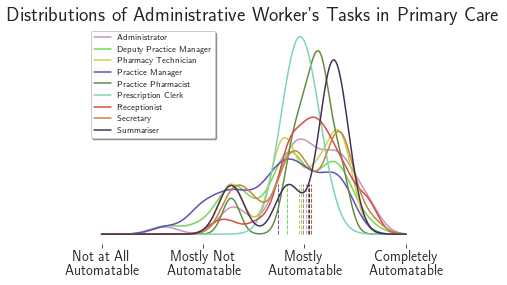

In [40]:
sns.set_style("white")
legend_text = []

f, ax = plt.subplots(1, 1)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')

ax.set_ylabel("")
# ax.vlines(x=np.mean(y), ymax=max(density(xs))*0.2, ymin=0., linestyles='--', linewidth=1., color='b')

ax.set_xticks([1., 2., 3., 4.])
ax.set_xticklabels(['Not at All\nAutomatable',
                'Mostly Not\nAutomatable',
                'Mostly\nAutomatable',
                'Completely\nAutomatable'], fontsize=14)

ax.set_title("Distributions of Administrative Worker's Tasks in Primary Care", fontsize=20)

# colors =   ['#c693bf','#73d758','#b849cc','#cdd152','#624db8','#628c41','#c54680','#80d3b3','#d44c3d',\
# '#6f9dc3','#c4853a','#462f55','#cbb394','#793f36','#42543c']

colors =   ['#c693bf','#73d758', '#cdd152','#624db8','#628c41','#80d3b3','#d44c3d',\
'#cbb394','#c4853a','#462f55']

for cnt in range(10):
    occu = dataset[dataset["Observed Occupation"] == clerical_occupations[cnt]] 
#     if clerical_occupations[cnt] == 'Prescription Clerk': continue
        
    y = occu["Weighted Average Automation Score"]
    
#     print(unique_occupations[cnt], y.shape, np.mean(y))
    if y.shape[0] <= 1: continue
        
    density = gaussian_kde(y, 'scott')
    # density = gaussian_kde(y, 'silverman')
    xs = np.linspace(1,4,200)
    
    
    density.covariance_factor = lambda : 0.3
    
    if clerical_occupations[cnt] == 'Prescription Clerk': 
        density.covariance_factor = lambda : 1.5
        
    density._compute_covariance()
    ax.plot(xs,density(xs), color=colors[cnt])     
    legend_text.append(clerical_occupations[cnt])
    ax.vlines(x=np.mean(y), ymax=1.8*0.3, ymin=0., linestyles='--', linewidth=1., color=colors[cnt])

fontP = FontProperties()
fontP.set_size('small')

ax.legend(legend_text, loc=0, shadow=True, fancybox=True, fontsize=16, prop=fontP)
savename = "single_occupation_kde"
plt.savefig(out_file_path+"{}.pdf".format(savename), format="pdf", bbox_inches='tight')
plt.savefig(out_file_path+"{}.png".format(savename), format="png", bbox_inches='tight')


## Clinical Workers performing Clerical Tasks


In [26]:
clinical_occupations

['General Practitioner',
 'Healthcare Assistant',
 'Nurse Practitioner',
 'Phlebotomist',
 'Practice Nurse']

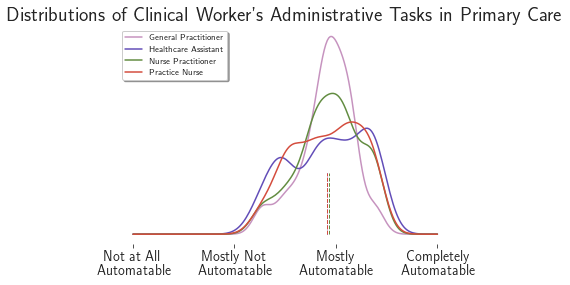

In [42]:
sns.set_style("white")
legend_text = []

f, ax = plt.subplots(1, 1)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
ax.set_ylabel("")

ax.set_xticks([1., 2., 3., 4.])
ax.set_xticklabels(['Not at All\nAutomatable',
                'Mostly Not\nAutomatable',
                'Mostly\nAutomatable',
                'Completely\nAutomatable'], fontsize=14)
ax.set_title("Distributions of Clinical Worker's Administrative Tasks in Primary Care", fontsize=20)

colors =   ['#c693bf','#624db8','#628c41','#80d3b3','#d44c3d',\
'#cbb394','#c4853a','#462f55']

for cnt in range(5):
    occu = dataset[dataset["Observed Occupation"] == clinical_occupations[cnt]] 
    y = occu["Weighted Average Automation Score"]
    
#     print(unique_occupations[cnt], y.shape, np.mean(y))
    if y.shape[0] <= 1: continue
    density = gaussian_kde(y, 'scott')
    # density = gaussian_kde(y, 'silverman')
    xs = np.linspace(1,4,200)
    density.covariance_factor = lambda : 0.35
    density._compute_covariance()
    ax.plot(xs,density(xs), color=colors[cnt])     
    legend_text.append(clinical_occupations[cnt])
    ax.vlines(x=np.mean(y), ymax=1.8*0.3, ymin=0., linestyles='--', linewidth=1., color=colors[cnt])

fontP = FontProperties()
fontP.set_size('small')

ax.legend(legend_text, loc=0, shadow=True, fancybox=True, fontsize=16, prop=fontP)
savename = "single_occupation_kde_clinical"
plt.savefig(out_file_path+"{}.pdf".format(savename), format="pdf", bbox_inches='tight')
plt.savefig(out_file_path+"{}.png".format(savename), format="png", bbox_inches='tight')


